In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow.keras as keras

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [38]:
genres = pd.read_csv('out_40_corrected.csv', encoding ='mac_cyrillic', sep=';')

In [39]:
# encoding the labels
genre_list = genres.coarse_genre
encoder = LabelEncoder()
y = np.array(encoder.fit_transform(genre_list))

In [40]:
X = np.array(genres.drop(['student', 'song', 'coarse_genre', 'genre1', 'genre2', 'genre3'], axis=1))

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)

In [42]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1, 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1, 1)
X_validation = X_validation.reshape(X_validation.shape[0], X_validation.shape[1], 1, 1)

In [43]:
X_train.shape

(207, 19, 1, 1)

In [44]:
from tensorflow.keras import backend as K
K.set_image_data_format('channels_last')

In [45]:
model = keras.Sequential()

# 1st conv layer
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 1), padding='same'))
model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.3))

# 2nd conv layer
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.3))

# 3rd conv layer
model.add(keras.layers.Conv2D(32, (2, 2), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.3))

# flatten output and feed it into dense layer
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))


# output layer
model.add(keras.layers.Dense(10, activation='softmax'))

In [56]:
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [57]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 19, 1, 32)         320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 10, 1, 32)         0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 10, 1, 32)         128       
_________________________________________________________________
dropout_12 (Dropout)         (None, 10, 1, 32)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 10, 1, 32)         9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 1, 32)          0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 5, 1, 32)         

In [58]:
history = model.fit(X_train, y_train, 
          validation_data=(X_validation, y_validation), 
          batch_size=32, epochs=100)

Epoch 1/100
7/7 [==============================] - 3s 187ms/step - loss: 1.7920 - accuracy: 0.2822 - val_loss: 1.9406 - val_accuracy: 0.2692
Epoch 2/100
7/7 [==============================] - 0s 48ms/step - loss: 1.7811 - accuracy: 0.2810 - val_loss: 1.9434 - val_accuracy: 0.2692
Epoch 3/100
7/7 [==============================] - 0s 48ms/step - loss: 1.8552 - accuracy: 0.2897 - val_loss: 1.9433 - val_accuracy: 0.2692
Epoch 4/100
7/7 [==============================] - 0s 45ms/step - loss: 1.8742 - accuracy: 0.2472 - val_loss: 1.9421 - val_accuracy: 0.2692
Epoch 5/100
7/7 [==============================] - 0s 43ms/step - loss: 1.8647 - accuracy: 0.2497 - val_loss: 1.9411 - val_accuracy: 0.2692
Epoch 6/100
7/7 [==============================] - 0s 43ms/step - loss: 1.8099 - accuracy: 0.2913 - val_loss: 1.9414 - val_accuracy: 0.2692
Epoch 7/100
7/7 [==============================] - 0s 48ms/step - loss: 1.7627 - accuracy: 0.2843 - val_loss: 1.9397 - val_accuracy: 0.2692
Epoch 8/100
7/7 [==

7/7 [==============================] - 0s 55ms/step - loss: 1.7930 - accuracy: 0.2571 - val_loss: 1.9152 - val_accuracy: 0.2692
Epoch 60/100
7/7 [==============================] - 0s 43ms/step - loss: 1.8540 - accuracy: 0.2543 - val_loss: 1.9161 - val_accuracy: 0.2692
Epoch 61/100
7/7 [==============================] - 0s 58ms/step - loss: 1.7462 - accuracy: 0.3178 - val_loss: 1.9157 - val_accuracy: 0.2692
Epoch 62/100
7/7 [==============================] - 0s 43ms/step - loss: 1.7370 - accuracy: 0.3308 - val_loss: 1.9151 - val_accuracy: 0.2692
Epoch 63/100
7/7 [==============================] - 0s 50ms/step - loss: 1.8355 - accuracy: 0.2540 - val_loss: 1.9151 - val_accuracy: 0.2500
Epoch 64/100
7/7 [==============================] - 0s 48ms/step - loss: 1.8037 - accuracy: 0.2584 - val_loss: 1.9138 - val_accuracy: 0.2500
Epoch 65/100
7/7 [==============================] - 0s 46ms/step - loss: 1.8050 - accuracy: 0.2995 - val_loss: 1.9110 - val_accuracy: 0.2500
Epoch 66/100
7/7 [========

In [54]:
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")


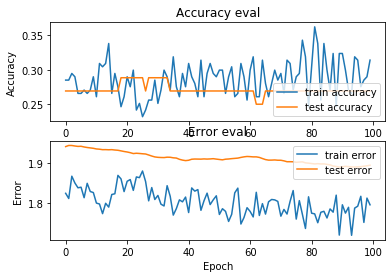

In [59]:
plot_history(history)